In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
import seaborn as sns
import xgboost as xg
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error

In [2]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('sales.csv')

# Sort the dataframe by BUSINESS_DATE_KEY
df_sorted = df.sort_values('BUSINESS_DATE_KEY')

# Calculate the split index
split_index = int(len(df_sorted) * 0.8)

# Split the data
train_data = df_sorted.iloc[:split_index]
test_data = df_sorted.iloc[split_index:]

# Save to new CSV files
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

In [3]:
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

In [5]:
train_df.head(5)

,STORE_KEY,STORE_NUMBER,OPEN_DATE,BUSINESS_DATE_KEY,BUSINESS_DATE,TEMP_CLOSE_INDICATOR,PROJECTION_INCLUDED_INDICATOR,BUSINESS_DATE_FISCAL_DAY_OF_YEAR,BUSINESS_DATE_FISCAL_YEAR,COMP_BUSINESS_DATE_FISCAL_YEAR,COMPARABLE_INDICATOR,TRANSACTION_FINAL_COUNT,NET_SALES_FINAL_USD_AMOUNT,PY_TRANSACTION_FINAL_COUNT,PY_NET_SALES_FINAL_USD_AMOUNT
0,1895,1114,5/3/2016,20190423,4/23/2019,NaN,0,115,2019,2018,1,125,1872.28,0,0.0
1,1291,469,4/1/2009,20190423,4/23/2019,NaN,0,115,2019,2018,1,236,3311.35,0,0.0
2,2124,1343,9/29/2017,20190423,4/23/2019,NaN,0,115,2019,2018,1,85,1272.57,0,0.0
3,2195,1416,5/24/2018,20190423,4/23/2019,NaN,0,115,2019,2018,0,142,2725.06,0,0.0
4,2299,1520,12/6/2018,20190423,4/23/2019,NaN,0,115,2019,2018,0,185,2785.28,0,0.0


In [6]:
test_df.head(3)

,STORE_KEY,STORE_NUMBER,OPEN_DATE,BUSINESS_DATE_KEY,BUSINESS_DATE,TEMP_CLOSE_INDICATOR,PROJECTION_INCLUDED_INDICATOR,BUSINESS_DATE_FISCAL_DAY_OF_YEAR,BUSINESS_DATE_FISCAL_YEAR,COMP_BUSINESS_DATE_FISCAL_YEAR,COMPARABLE_INDICATOR,TRANSACTION_FINAL_COUNT,NET_SALES_FINAL_USD_AMOUNT,PY_TRANSACTION_FINAL_COUNT,PY_NET_SALES_FINAL_USD_AMOUNT
0,2324,1545,11/2/2018,20230318,3/18/2023,0.0,0,77,2023,2022,1,254,3894.46,243,3141.32
1,1229,407,12/27/2008,20230318,3/18/2023,0.0,0,77,2023,2022,1,312,7531.37,203,5380.61
2,1455,633,10/10/2012,20230318,3/18/2023,0.0,0,77,2023,2022,1,192,4712.56,161,3556.49


In [7]:
 CLASS_LABEL = 'Sales'
print(f'\nTrain contains {train_df.shape[0]} samples and {train_df.shape[1]} variables')
print(f'\nTest contains {test_df.shape[0]} samples and {test_df.shape[1]} variables')


Train contains 505757 samples and 15 variables

Test contains 126440 samples and 15 variables


In [8]:
nulls=[]
for i in train_df.columns:
  nul=train_df[i].isnull().sum()
  nulls.append(nul)
pd.DataFrame({'columns':train_df.columns,'missing values':nulls})

,columns,missing values
0,STORE_KEY,0
1,STORE_NUMBER,0
2,OPEN_DATE,0
3,BUSINESS_DATE_KEY,0
4,BUSINESS_DATE,0
5,TEMP_CLOSE_INDICATOR,260212
6,PROJECTION_INCLUDED_INDICATOR,0
7,BUSINESS_DATE_FISCAL_DAY_OF_YEAR,0
8,BUSINESS_DATE_FISCAL_YEAR,0
9,COMP_BUSINESS_DATE_FISCAL_YEAR,0


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505757 entries, 0 to 505756
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   STORE_KEY                         505757 non-null  int64  
 1   STORE_NUMBER                      505757 non-null  int64  
 2   OPEN_DATE                         505757 non-null  object 
 3   BUSINESS_DATE_KEY                 505757 non-null  int64  
 4   BUSINESS_DATE                     505757 non-null  object 
 5   TEMP_CLOSE_INDICATOR              245545 non-null  float64
 6   PROJECTION_INCLUDED_INDICATOR     505757 non-null  int64  
 7   BUSINESS_DATE_FISCAL_DAY_OF_YEAR  505757 non-null  int64  
 8   BUSINESS_DATE_FISCAL_YEAR         505757 non-null  int64  
 9   COMP_BUSINESS_DATE_FISCAL_YEAR    505757 non-null  int64  
 10  COMPARABLE_INDICATOR              505757 non-null  int64  
 11  TRANSACTION_FINAL_COUNT           505757 non-null  i

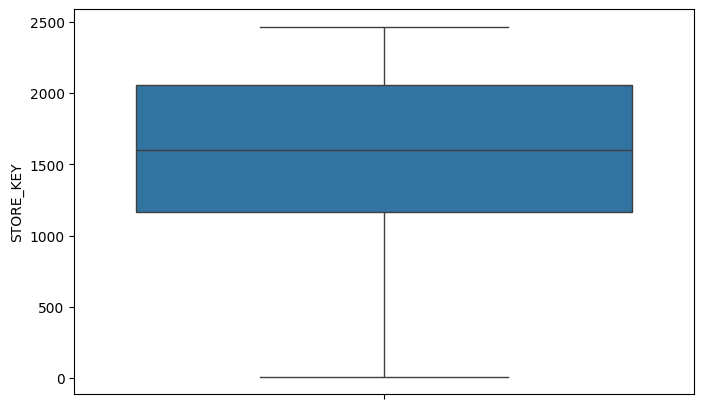

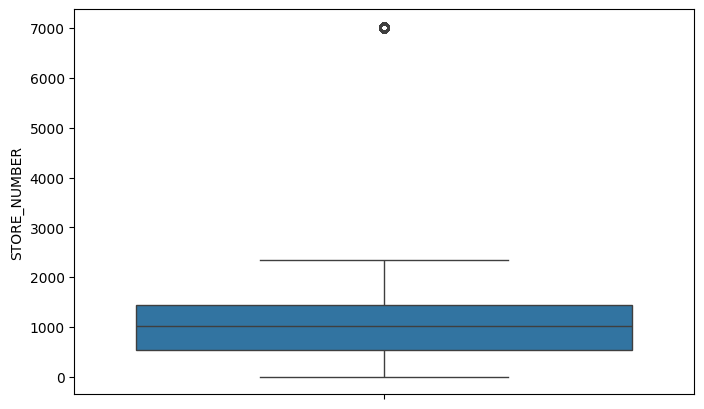

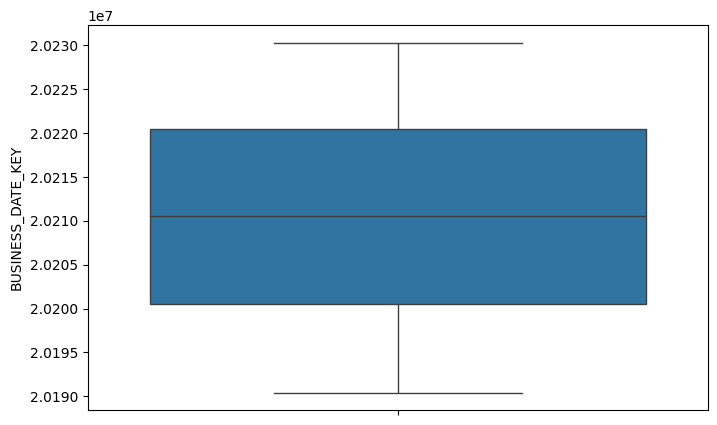

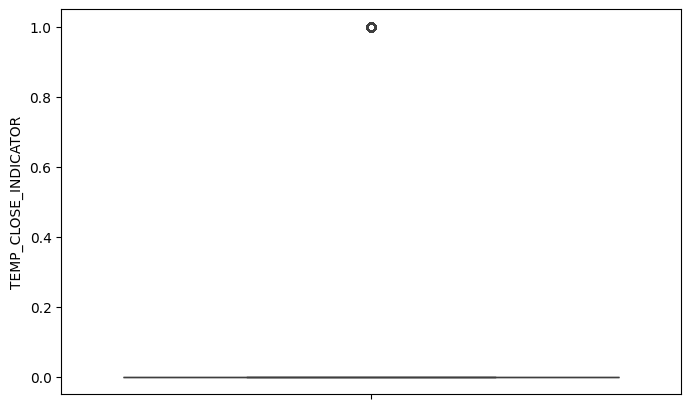

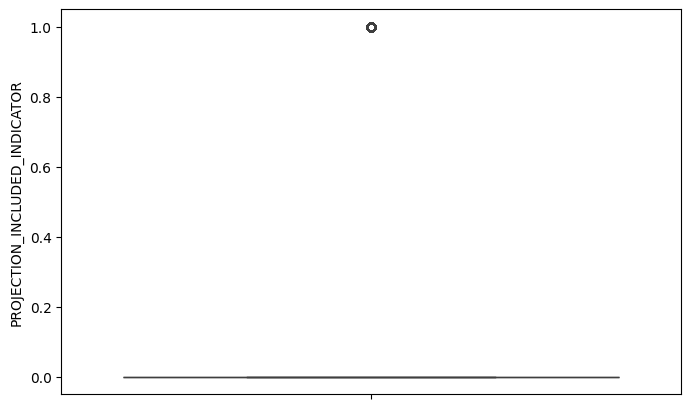

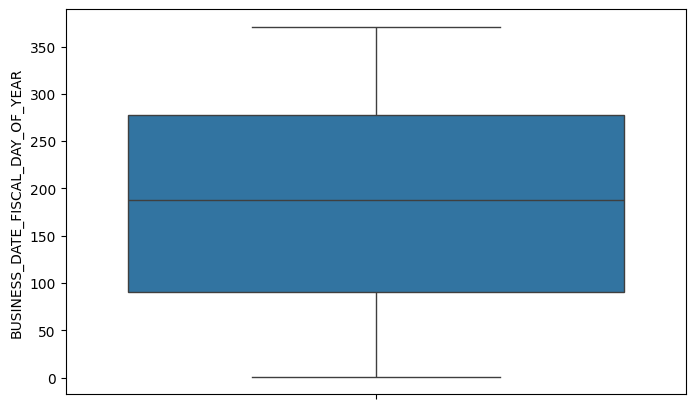

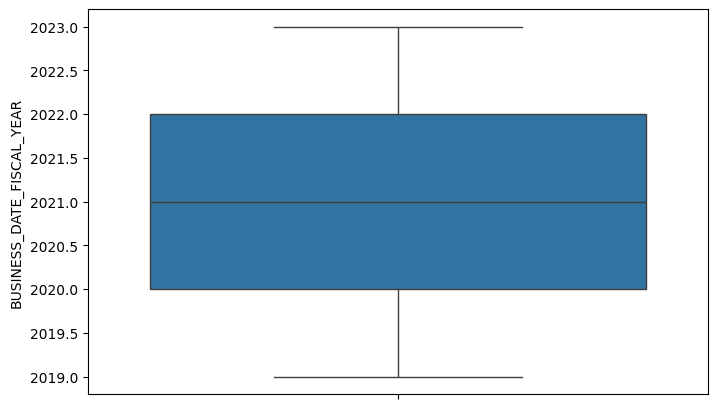

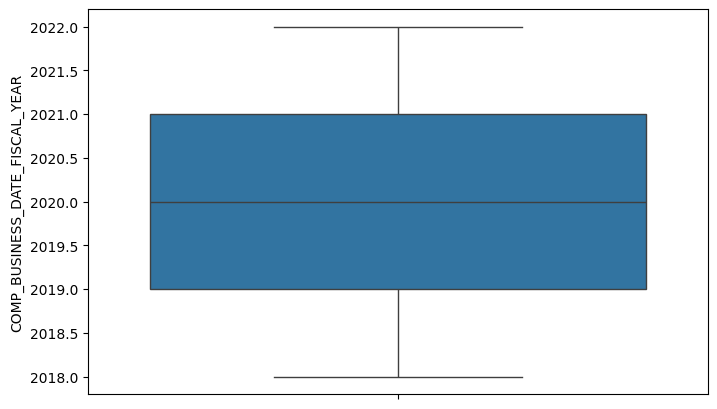

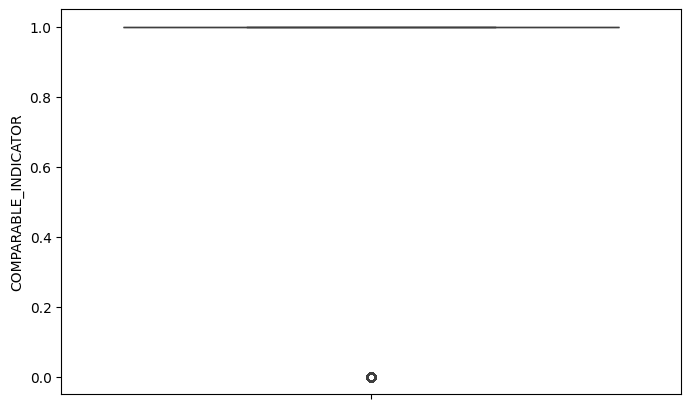

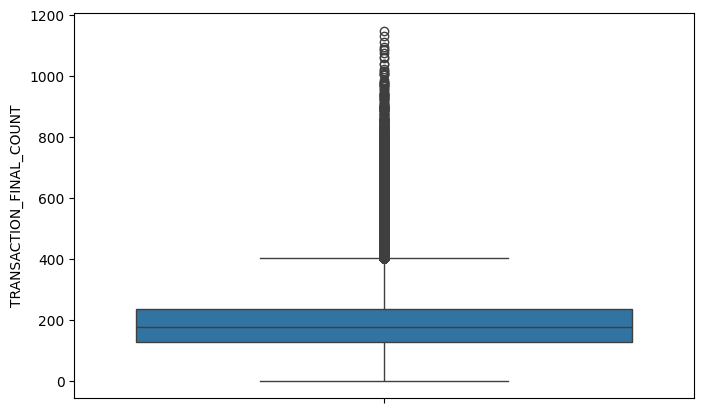

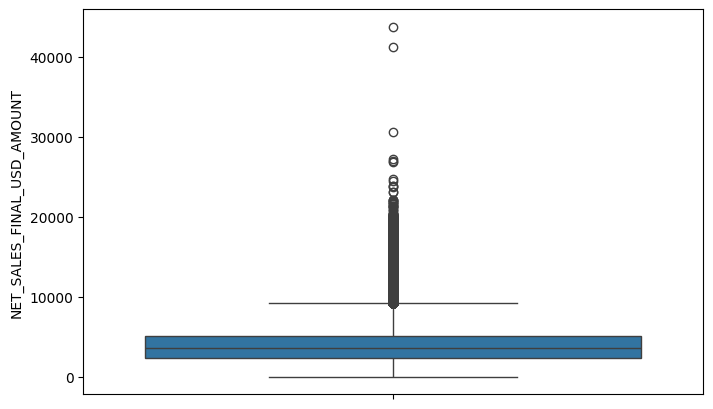

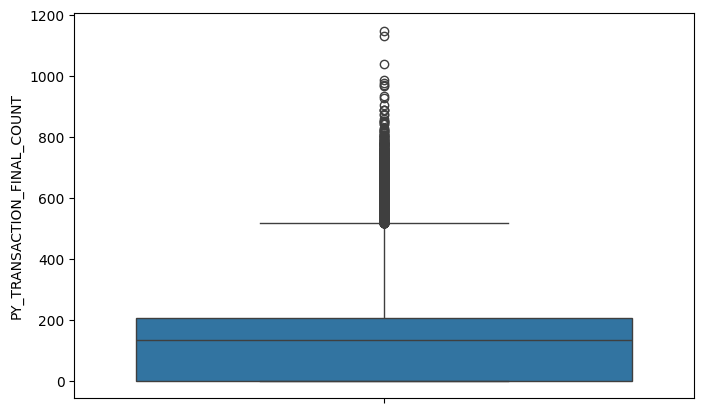

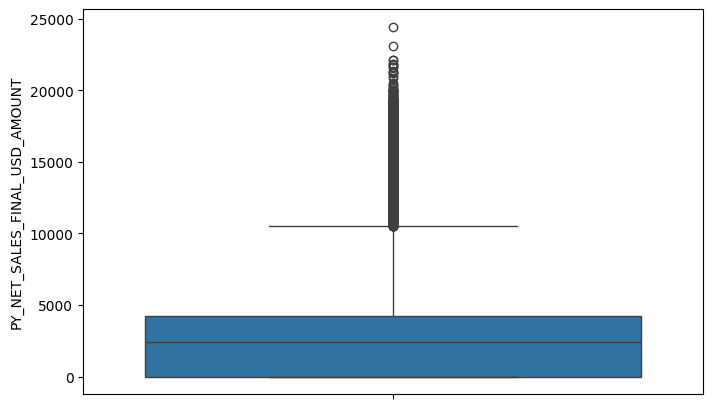

In [10]:
for i in train_df.describe().columns:
  plt.figure(figsize=(8,5))
  sns.boxplot(train_df[i])

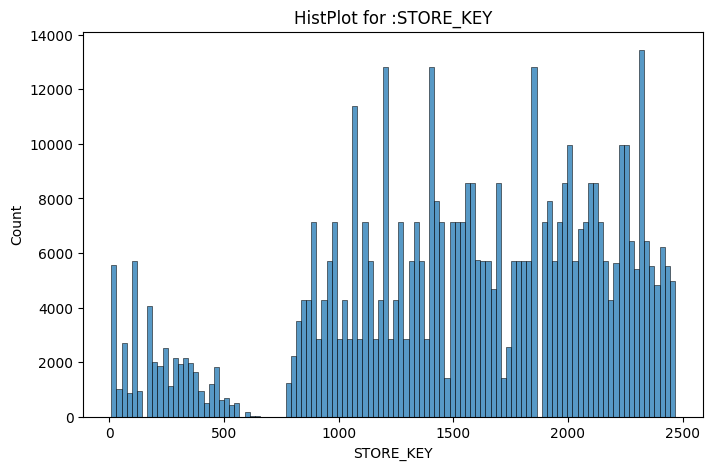

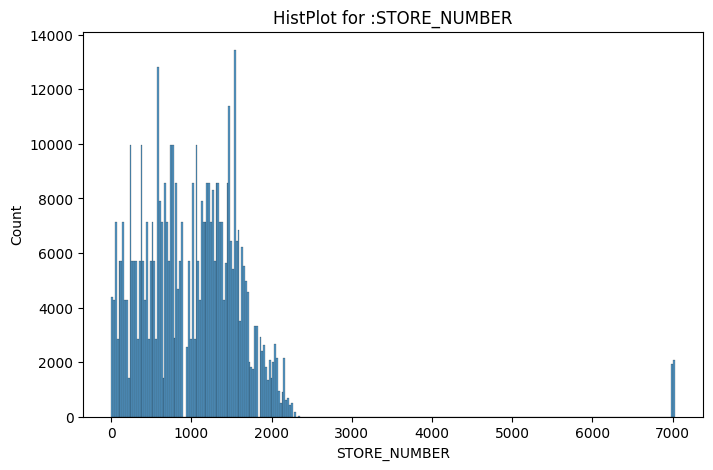

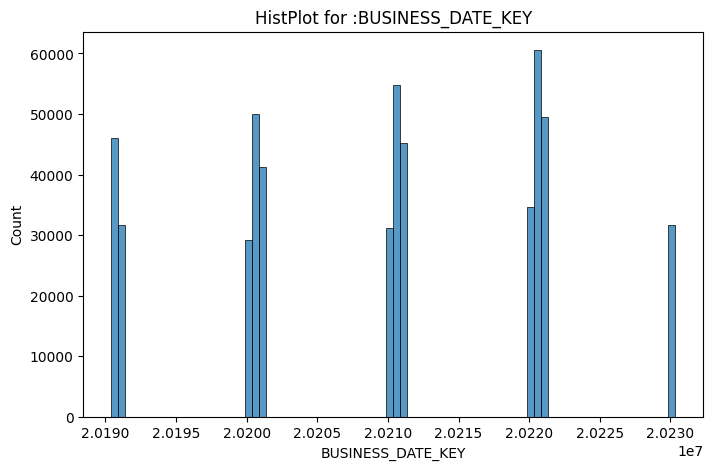

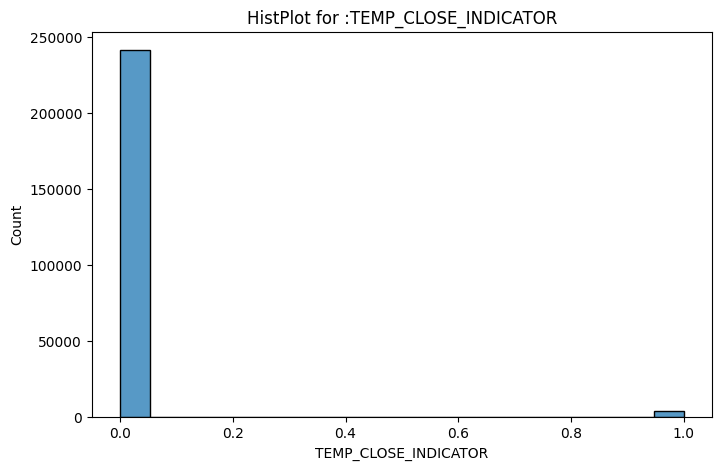

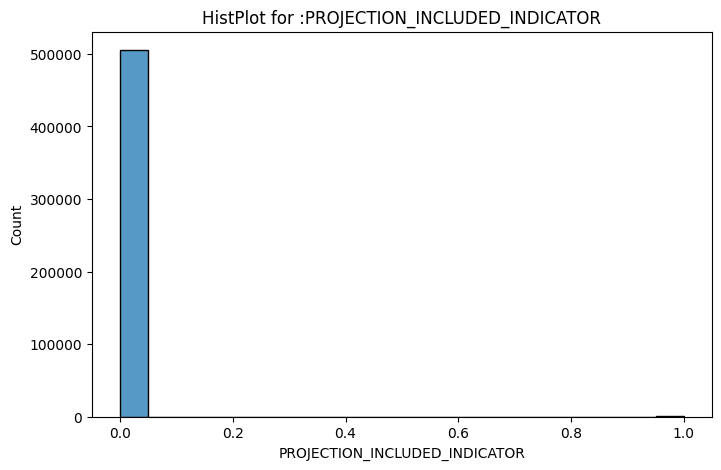

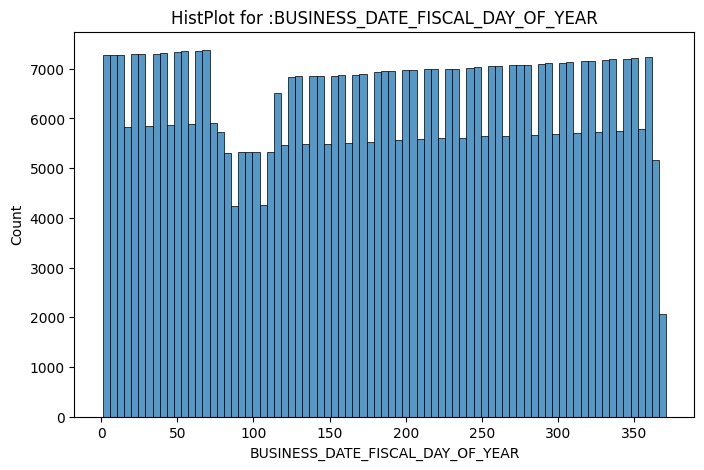

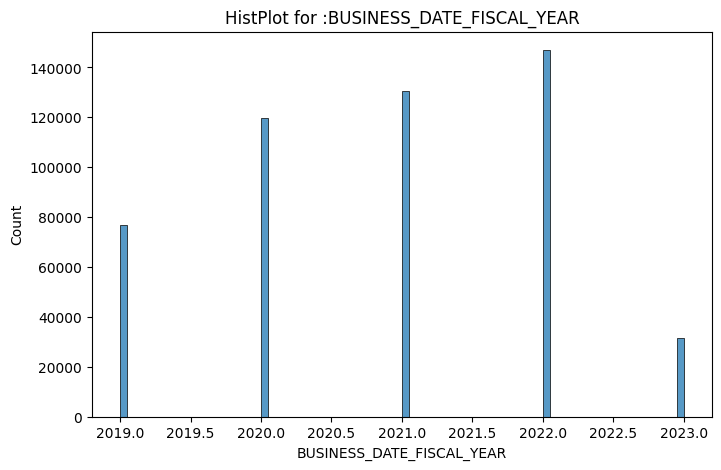

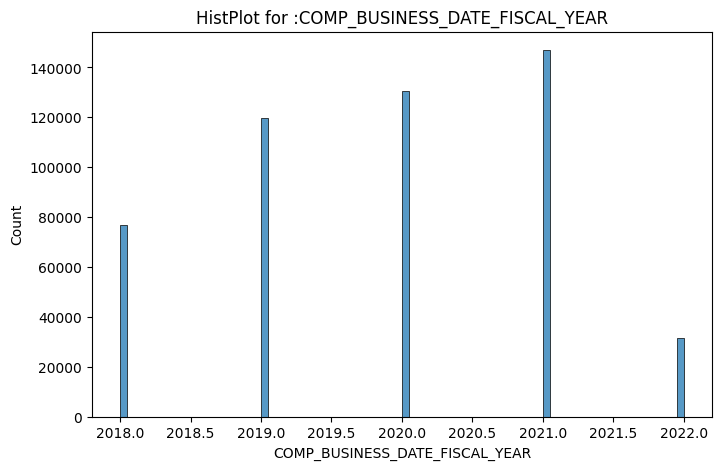

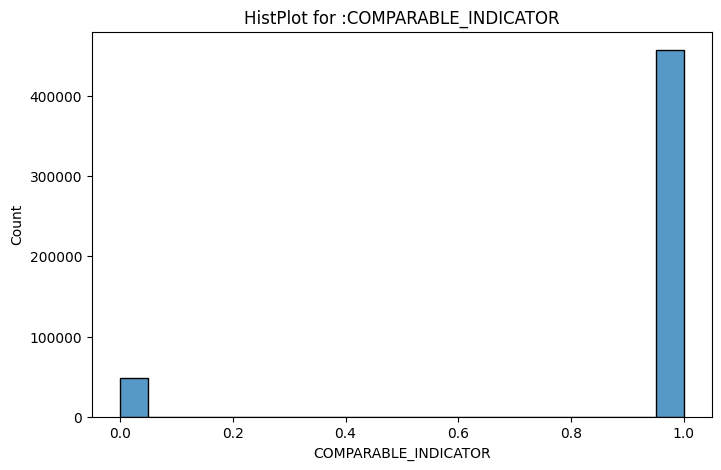

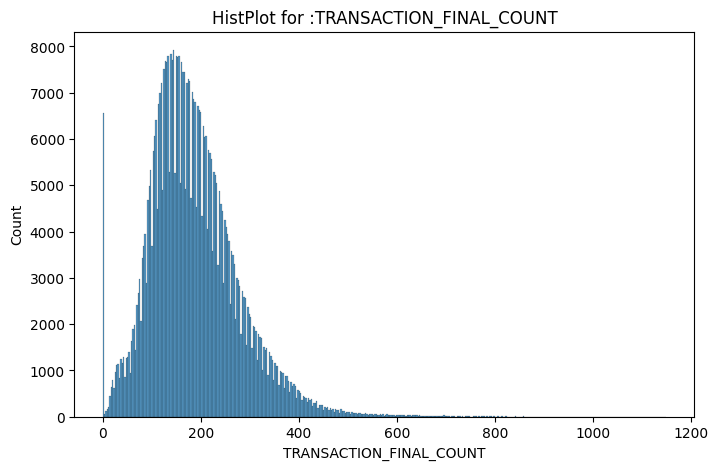

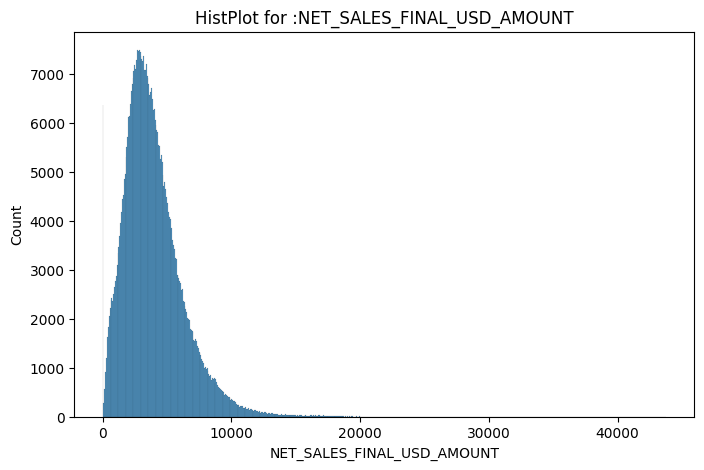

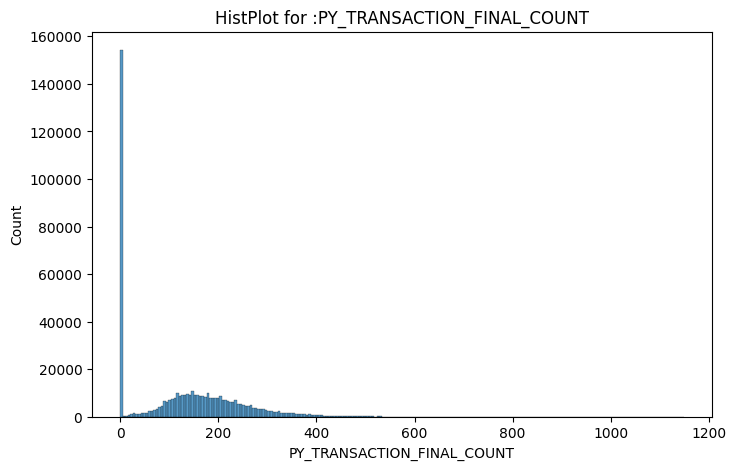

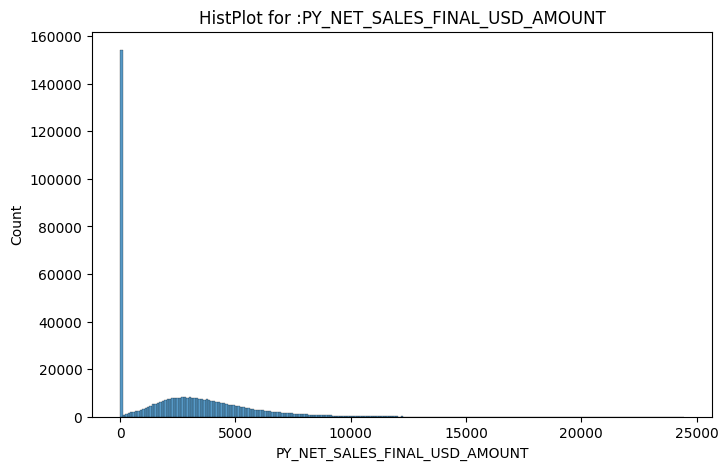

In [11]:
for i in train_df.describe().columns:
  plt.figure(figsize=(8,5))
  plt.title('HistPlot for :'+i)
  sns.histplot(train_df[i])

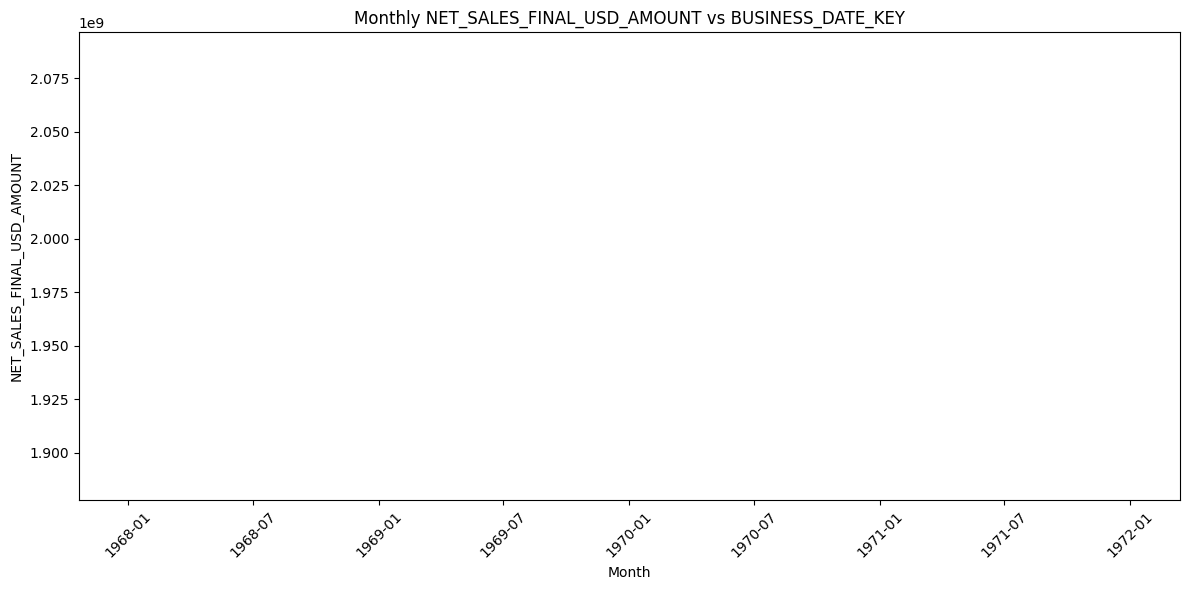

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data loading
# train_df = pd.read_csv('your_data.csv') # replace with your data loading method

# Ensure BUSINESS_DATE_KEY is datetime
train_df['BUSINESS_DATE_KEY'] = pd.to_datetime(train_df['BUSINESS_DATE_KEY'])

# Extract year and month
train_df['YearMonth'] = train_df['BUSINESS_DATE_KEY'].dt.to_period('M')

# Group by YearMonth and calculate the total sales
monthly_sales = train_df.groupby('YearMonth')['NET_SALES_FINAL_USD_AMOUNT'].sum().reset_index()

# Convert YearMonth back to datetime for plotting
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='NET_SALES_FINAL_USD_AMOUNT', data=monthly_sales)
plt.title('Monthly NET_SALES_FINAL_USD_AMOUNT vs BUSINESS_DATE_KEY')
plt.xlabel('Month')
plt.ylabel('NET_SALES_FINAL_USD_AMOUNT')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
